# Neal's Funnel Target Practice

In [1]:
] activate "../"

  Activating project at `~/PhD/MicroCanonicalHMC.jl`


In [2]:
# The statistical inference frame-work we will use
using Turing
using ForwardDiff
using LinearAlgebra
using Random
#using StatsPlots
using PyPlot
using Distributed

using Revise
using MicroCanonicalHMC

[ Info: Precompiling MicroCanonicalHMC [234d2aa0-2291-45f7-9047-6fa6f316b0a8]


In [3]:
d = 21
@model function funnel()
    θ ~ Truncated(Normal(0, 3), -3, 3)
    z ~ MvNormal(zeros(d-1), exp(θ)*I)
    x ~ MvNormal(z, I)
end

funnel (generic function with 2 methods)

In [4]:
Random.seed!(1)
(;x) = rand(funnel() | (θ=0,))
funnel_model = funnel() | (;x)

DynamicPPL.Model{typeof(funnel), (), (), (), Tuple{}, Tuple{}, DynamicPPL.ConditionContext{NamedTuple{(:x,), Tuple{Vector{Float64}}}, DynamicPPL.DefaultContext}}(funnel, NamedTuple(), NamedTuple(), ConditionContext((x = [1.2142074831535152, 1.23371919965455, -0.8480146960461767, 0.1600994648479841, 1.9180385508479283, -3.401523464506408, -0.0957684186471088, 0.6734622629464286, -3.2749467689509633, -1.6760091758453226, 1.9567202902549736, 0.1136169088905351, 0.11117896909388916, -0.5373922347882832, -0.12436857036298687, -1.2901071061088532, 1.702584517514787, -0.44460133117954226, 1.0818722439221686, 1.2208011493237483],), DynamicPPL.DefaultContext()))

In [5]:
mchmc = MCHMC(10_000, 0.01; adaptive=true)
espl = externalsampler(mchmc)

Turing.Inference.ExternalSampler{MicroCanonicalHMC.MCHMCSampler}(MicroCanonicalHMC.MCHMCSampler(Settings{Float64}(10000, 0.01, 1, true, "LF", nothing, nothing, nothing), MicroCanonicalHMC.Hyperparameters{Float64}(0.0, 0.0, 0.0, 0.1931833275037836, [0.0], 0.9607843137254902, 1.5), MicroCanonicalHMC.Leapfrog))

In [7]:
samples = sample(funnel_model, espl, 100_000);

2mMCHMC (tuning): 100%|███████████████████████████████████| Time: 0:00:01[ Info: eps: 2.761424022080078
[ Info: L: 4.58257569495584
[ Info: nu: 0.33362182231813897
[ Info: sigma: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[ Info: adaptive: true
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04


In [8]:
theta = [samples.value.data[i, 1, :][1] for i in axes(samples.value.data)[1]]
x10 = [samples.value.data[i, 10+1, :][1] for i in axes(samples.value.data)[1]];

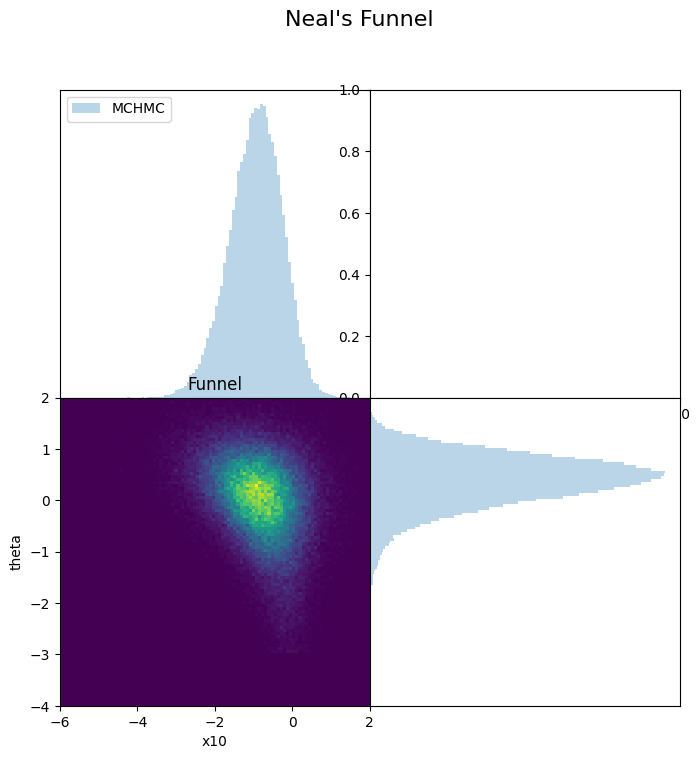

PyObject Text(0.5, 1.0, 'Funnel')

In [9]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("Neal's Funnel", fontsize=16)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10, bins=100, range=[-6,2], alpha = 0.3, label="MCHMC")
axis[1,1].legend()
axis[1,1].set_yticks([])

axis[2,2].hist(theta, bins=100, orientation="horizontal", range=[-6, 2], alpha = 0.3)
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(x10, theta, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta")
axis[2,1].set_title("Funnel")